In [48]:
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
import skimage.io


In [49]:
img=skimage.io.imread(fname='1.jpg')
img.shape

(499, 381, 3)

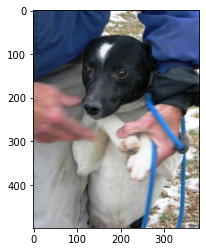

In [50]:
fig,ax=plt.subplots()
plt.imshow(img)

TASK 1

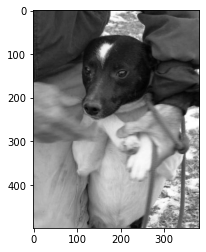

In [51]:
R,G,B=img[:,:,0],img[:,:,1],img[:,:,2]
gray_image=((0.3 * R) + (0.59 * G) + (0.11 * B))
plt.imshow(gray_image,cmap='gray')



In [52]:
import cv2
from skimage.exposure import rescale_intensity

In [53]:
def apply_filter(image,kernel):
    
    IH,IW=image.shape[:2]
    
    FH,FW=kernel.shape[:2]
    

    padding=(FW-1)//2
    
    image=cv2.copyMakeBorder(image,padding,padding,padding,padding,cv2.BORDER_REPLICATE)
    
    output=np.zeros((IH,IW),dtype="float32")


    for y in np.arange(padding,IH+padding):
        for x in np.arange(padding,IW+padding):

            
            roi = image[y - padding:y + padding+1 , x - padding:x + padding+1]
            
            k=(roi*kernel).sum()
            output[y-padding,x-padding]=k

    output=rescale_intensity(output,in_range=(0,255))
    output=(output*255).astype("uint8")
           

    return output        





TASK 3

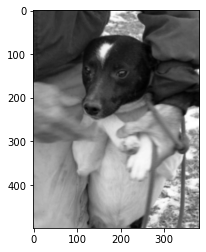

In [54]:

corr_filter=np.ones((3,3),dtype="float")*(1.0/(3*3))
cov_filter=np.flip(corr_filter) #send this filter for convulation filtering
convulation_image=apply_filter(gray_image,corr_filter)
fig,ax=plt.subplots()
plt.imshow(convulation_image, cmap="gray")


TASK 5 FIRST DERIVATIVE

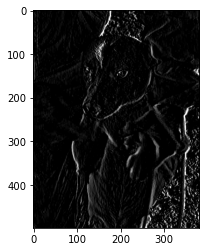

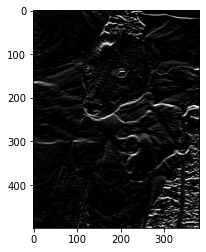

In [55]:

sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")
filtered_image=apply_filter(gray_image,sobelX)
fig,ax=plt.subplots()
plt.imshow(filtered_image, cmap="gray")

filtered_image=apply_filter(gray_image,sobelY)
fig,ax=plt.subplots()
plt.imshow(filtered_image, cmap="gray")


TASK 5 2ND ORDER DERIVATIVE

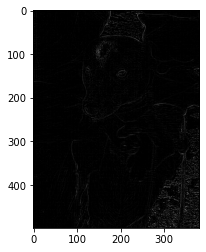

In [56]:
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")


filtered_image=apply_filter(gray_image,laplacian)
fig,ax=plt.subplots()
plt.imshow(filtered_image, cmap="gray")

TASK 6


As we can see through the histogram of the image that there are random spikes in the image for some constanc values between 0-255, which tells us that there is Salt and Pepper noise in the image.

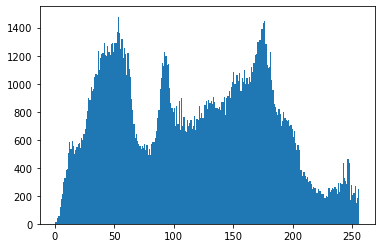

In [57]:
plt.hist(gray_image.ravel(),256,[0,256])
plt.show()

In [58]:
def apply_median(image):
    
    IH,IW=image.shape[:2]
    output=np.zeros((IH,IW),dtype="float32")


    for y in np.arange(0,IH):
        for x in np.arange(0,IW):

            
            roi = image[y:y+1 , x :x+1]
            k = round(np.median(np.reshape(roi, newshape=(-1,))))
            
            output[y,x]=k

    output=rescale_intensity(output,in_range=(0,255))
    output=(output*255).astype("uint8")
           

    return output    

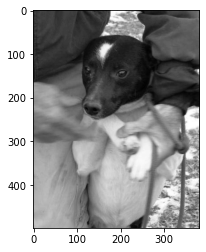

In [59]:
filtered_image=apply_median(gray_image)
fig,ax=plt.subplots()
plt.imshow(filtered_image, cmap="gray")